In [3]:
#데이터 로드
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


file_path = "./wine.csv"
df = pd.read_csv(file_path)

In [4]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['Wine'], axis = 1) 
y = df['Wine']  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [15]:
from sklearn.ensemble import RandomForestClassifier


# 모델 학습
model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [17]:
#하이퍼파라미터 튜닝
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
최고 정확도: 0.9785714285714286
튜닝 후 정확도: 1.0


Confusion Matrix (Basic):
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Confusion Matrix (Tuned):
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


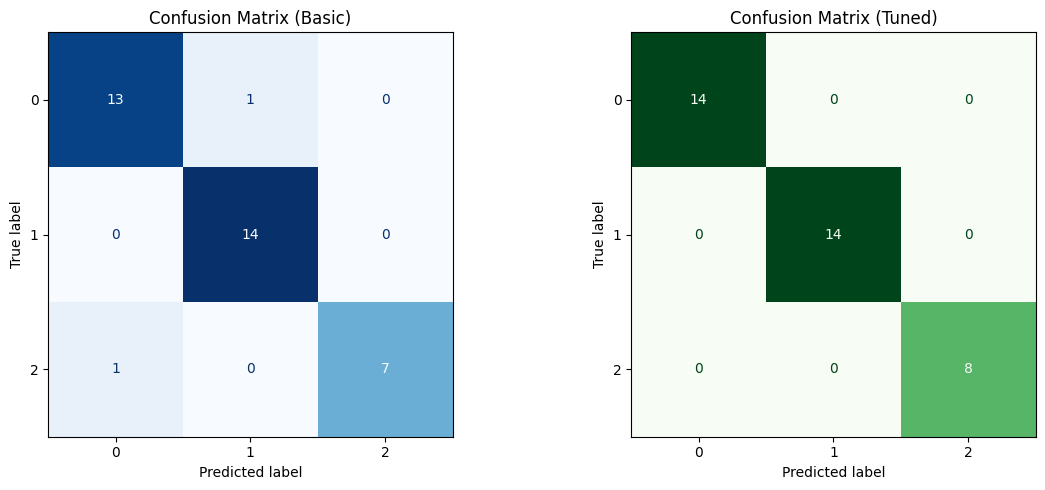

In [29]:
#혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Basic):")
print(conf_matrix)

y_pred_tuned = tuned_model.predict(X_test_scaled)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix (Tuned):")
print(conf_matrix_tuned)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix (Basic)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned)
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Confusion Matrix (Tuned)")

plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(max_depth = 3, random_state=42)

# 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")      

Accuracy: 0.9444


In [20]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_depth': randint(3, 10), 'min_samples_split': randint(2, 10)}

random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring="accuracy")
random_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", random_search.best_params_)
print("최고 정확도:", random_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'max_depth': 8, 'min_samples_split': 6}
최고 정확도: 0.9224137931034484
튜닝 후 정확도: 1.0


Confusion Matrix (basic):
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Confusion Matrix (tuned):
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


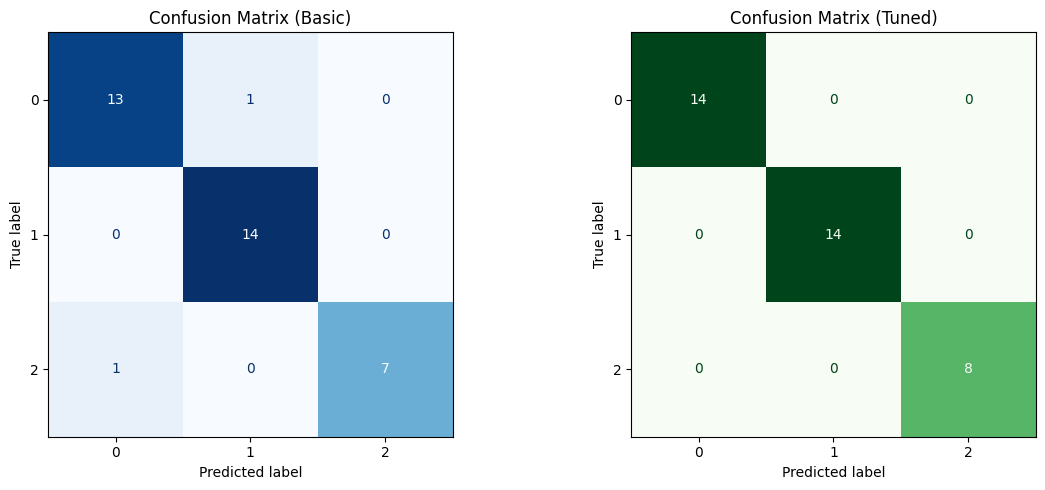

In [35]:
# 혼동 행렬 계산
conf_matrix_basic = confusion_matrix(y_test, y_pred)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Confusion Matrix (basic):")
print(conf_matrix_basic)
print("Confusion Matrix (tuned):")
print(conf_matrix_tuned)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_basic)
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix (Basic)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned)
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Confusion Matrix (Tuned)")

plt.tight_layout()
plt.show()

In [160]:
from sklearn.svm import SVC

# SVC 모델 학습
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")      

Accuracy: 1.0000


In [161]:
#하이퍼파라미터 튜닝
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
최고 정확도: 0.9857142857142858
튜닝 후 정확도: 1.0


Confusion Matrix (basic):
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Confusion Matrix (tuned):
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


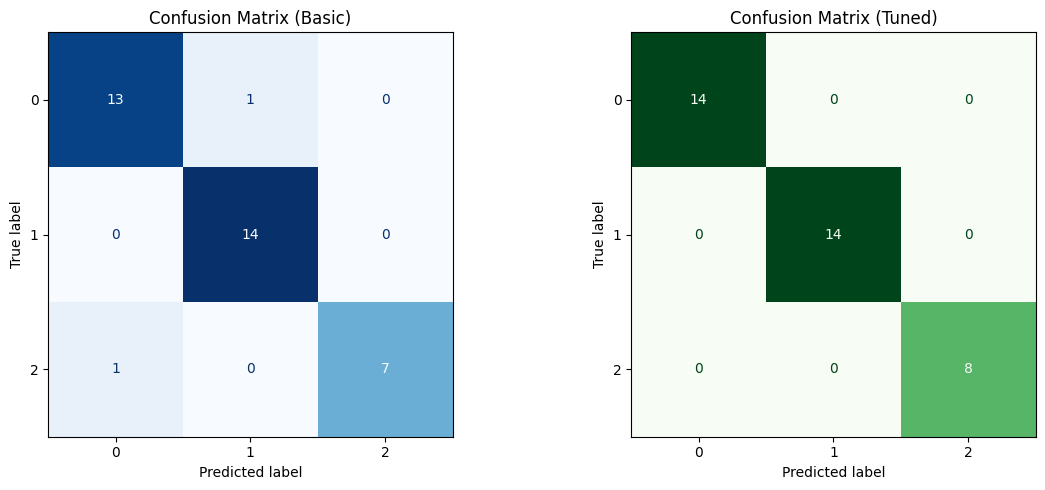

In [37]:
# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)
y_pred_tuned = tuned_model.predict(X_test_scaled)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Confusion Matrix (basic):")
print(conf_matrix)
print("Confusion Matrix (tuned):")
print(conf_matrix_tuned)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix (Basic)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned)
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Confusion Matrix (Tuned)")

plt.tight_layout()
plt.show()

In [163]:
from sklearn.linear_model import LogisticRegression

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 로지스틱 회귀 모델 학습 (max_iter 늘리고, solver 변경)
model = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [164]:
# 하이퍼파라미터 튜닝: 'solver'와 'penalty' 조건을 맞추기 위해 필터링
from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']}, {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}]

# GridSearchCV로 최적화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

#하이퍼 파라미터 튜닝 후 정확도
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
최고 정확도: 0.9928571428571429
튜닝 후 정확도: 1.0


Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Confusion Matrix (튜닝 후):
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


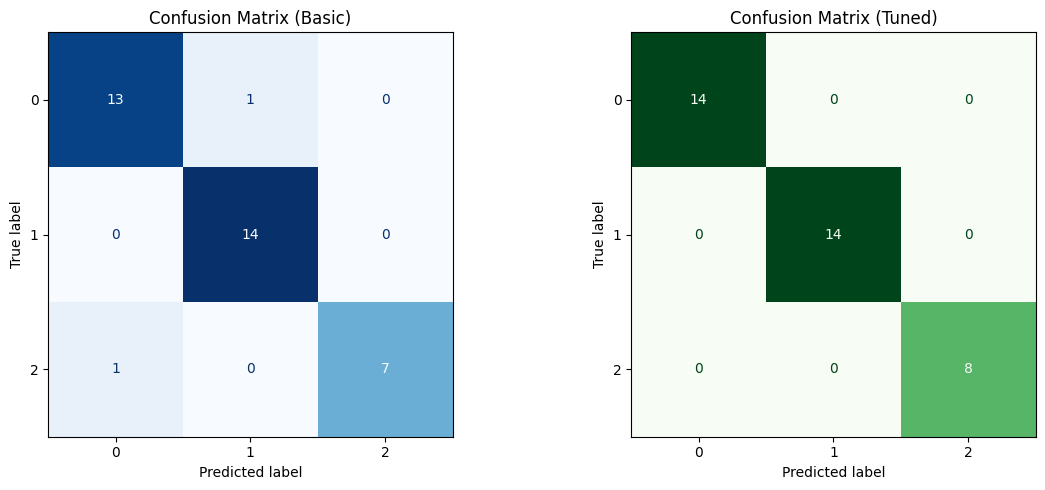

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
y_pred_tuned = tuned_model.predict(X_test_scaled)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Confusion Matrix:")
print(conf_matrix)
print("Confusion Matrix (튜닝 후):")
print(conf_matrix_tuned)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Confusion Matrix (Basic)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned)
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Confusion Matrix (Tuned)")

plt.tight_layout()
plt.show()